In [716]:
# Importing libraries needed

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from scipy.stats import zscore    

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier    
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import model_selection
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [717]:
# Importing both the datasets

df1 = pd.read_csv('train (2).csv')
df2 = pd.read_csv('test (2).csv')

In [718]:
print(df1.shape)
print(df2.shape)

(891, 12)
(418, 11)


In [719]:
df1.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [720]:
df2.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [721]:
df = pd.concat([df1,df2],axis=0)

In [722]:
df.isnull().sum()

Age             263
Cabin          1014
Embarked          2
Fare              1
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived        418
Ticket            0
dtype: int64

## Working with null values

In [723]:
# Deleting the 'Cabin' field.

df = df.drop('Cabin',axis=1)
df.isnull().sum()

Age            263
Embarked         2
Fare             1
Name             0
Parch            0
PassengerId      0
Pclass           0
Sex              0
SibSp            0
Survived       418
Ticket           0
dtype: int64

In [724]:
# Fare field has 1 null value so filling it with mean

df["Fare"].fillna(df["Fare"].mean(),inplace = True) 
df.isnull().sum()

Age            263
Embarked         2
Fare             0
Name             0
Parch            0
PassengerId      0
Pclass           0
Sex              0
SibSp            0
Survived       418
Ticket           0
dtype: int64

In [725]:
# Filling nan values with class 'S'

df.loc[df1.Embarked.isnull(), 'Embarked'] = 'S'
df.Embarked.fillna('S', inplace=True)
df.isnull().sum()

Age            263
Embarked         0
Fare             0
Name             0
Parch            0
PassengerId      0
Pclass           0
Sex              0
SibSp            0
Survived       418
Ticket           0
dtype: int64

In [726]:
# Age has 263 null values and we are filling the field using the name column

name_column=str()
fname=str()
title=list()
for i in df.Name:
    name_column=(str(i))
    fname=(name_column.split(',')[1])
    title.append(fname.split('.')[0])
df['Title']=title

In [727]:
df["Title"].unique()

array([' Mr', ' Mrs', ' Miss', ' Master', ' Don', ' Rev', ' Dr', ' Mme',
       ' Ms', ' Major', ' Lady', ' Sir', ' Mlle', ' Col', ' Capt',
       ' the Countess', ' Jonkheer', ' Dona'], dtype=object)

In [728]:
# Filling the age field with respect of title field by filling its median

title_age=df.groupby('Title').Age.transform('median')
df.Age.fillna(title_age,inplace=True)

In [729]:
df.isnull().sum()

Age              0
Embarked         0
Fare             0
Name             0
Parch            0
PassengerId      0
Pclass           0
Sex              0
SibSp            0
Survived       418
Ticket           0
Title            0
dtype: int64

### Basic EDA

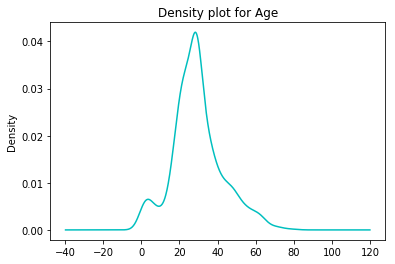

In [730]:
df.Age.plot(kind='kde', title='Density plot for Age', color='c');

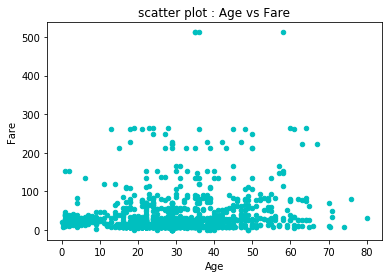

In [731]:
df.plot.scatter(x='Age', y='Fare', color='c', title='scatter plot : Age vs Fare');

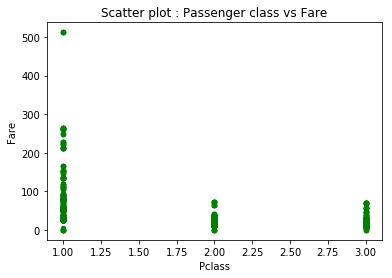

In [732]:
df.plot.scatter(x='Pclass', y='Fare', color='g', title='Scatter plot : Passenger class vs Fare');

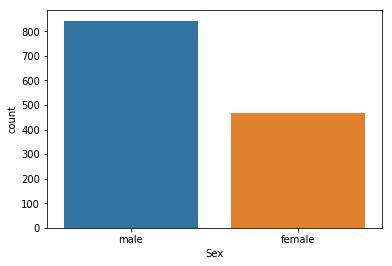

In [733]:
sns.countplot(data=df,x='Sex')

In [734]:
df.columns

Index(['Age', 'Embarked', 'Fare', 'Name', 'Parch', 'PassengerId', 'Pclass',
       'Sex', 'SibSp', 'Survived', 'Ticket', 'Title'],
      dtype='object')

In [735]:
# Deleting unwanted columns

df = df.drop(['Title','Name','Ticket','PassengerId'],axis=1)

In [736]:
print(df.columns)

Index(['Age', 'Embarked', 'Fare', 'Parch', 'Pclass', 'Sex', 'SibSp',
       'Survived'],
      dtype='object')


In [737]:
df.dtypes

Age         float64
Embarked     object
Fare        float64
Parch         int64
Pclass        int64
Sex          object
SibSp         int64
Survived    float64
dtype: object

In [738]:
# Creating dummies

df = pd.get_dummies(df,columns=['Pclass','Embarked','Sex','SibSp','Parch'],drop_first=True)

df.dtypes

Age           float64
Fare          float64
Survived      float64
Pclass_2        uint8
Pclass_3        uint8
Embarked_Q      uint8
Embarked_S      uint8
Sex_male        uint8
SibSp_1         uint8
SibSp_2         uint8
SibSp_3         uint8
SibSp_4         uint8
SibSp_5         uint8
SibSp_8         uint8
Parch_1         uint8
Parch_2         uint8
Parch_3         uint8
Parch_4         uint8
Parch_5         uint8
Parch_6         uint8
Parch_9         uint8
dtype: object

In [739]:
# Now seperating the datasets

df1 = df.head(891)
df2 = df.tail(418)

In [740]:
# Removing the Survived column from df2

df2 = df2.drop('Survived',axis=1)

In [741]:
#df1 is main train set
#df2 is main test set

In [742]:
x1  = df1.iloc[:,[0,1,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]]
y1  = df1['Survived']

x2  = df2.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]]


In [743]:
x1=StandardScaler().fit_transform(x1)
x2=StandardScaler().fit_transform(x2)

In [744]:
# Spilling data in train and validation

from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val=train_test_split(x1,y1,test_size=0.3,random_state=2)

## Logistic Regression

In [745]:
model1=LogisticRegression()
model1.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [746]:
y_val1=model1.predict(x_val)

In [747]:
acc1=metrics.accuracy_score(y_val,y_val1)
print(acc1)

0.7835820895522388


In [748]:
cm1=metrics.confusion_matrix(y_val,y_val1)
print(cm1)

[[139  21]
 [ 37  71]]


In [749]:
cr1=metrics.classification_report(y_val,y_val1)
print(cr1)

              precision    recall  f1-score   support

         0.0       0.79      0.87      0.83       160
         1.0       0.77      0.66      0.71       108

   micro avg       0.78      0.78      0.78       268
   macro avg       0.78      0.76      0.77       268
weighted avg       0.78      0.78      0.78       268



In [750]:
y_test1 = model1.predict(x2)
y_test1

array([0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       0., 1., 0., 0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1.,
       0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0.,
       0., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 1., 1., 1., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0.,
       1., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       1., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 1.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1.,
       0., 1., 0., 1., 1.

In [751]:
myfile1 = pd.DataFrame(y_test1, columns = ['Predicted'])
myfile1.to_csv('Logistic Regression.csv')

### Logistic Regression gives out an accuracy of 0.79%